# Activation Fucntions

In this jupyter notebook file, different activation functions have been tried on Fasion_MNIST dataset.

## ReLU 

ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as 
$y = max(0, x)$ and visually it looks like the following image:
<img src="images/relu.jpg" width=500>

ReLU is the most commonly used activation function in neural networks, especially in CNNs.
The fol

#### Advantages and Disadvantages

- It’s cheap to compute as there is no complicated math. The model can therefore take less time to train or run.

- It converges faster. Linearity means that the slope doesn’t plateau, or “saturate,” when x gets large. It doesn’t have the vanishing gradient problem suffered by other activation functions like sigmoid or tanh.

- It’s sparsely activated. Since ReLU is zero for all negative inputs, it’s likely for any given unit to not activate at all. This is often desirable.

- Dying ReLU
    - A ReLU neuron is “dead” if it’s stuck in the negative side and always outputs 0. Because the slope of ReLU in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. Such neurons are not playing any role in discriminating the input and is essentially useless. Over the time you may end up with a large part of your network doing nothing.

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 55us/sample - loss: 1.4857 - accuracy: 0.5274 - val_loss: 0.9629 - val_accuracy: 0.7024
Epoch 2/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.8461 - accuracy: 0.7153 - val_loss: 0.7503 - val_accuracy: 0.7396
Epoch 3/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.7176 - accuracy: 0.7502 - val_loss: 0.6677 - val_accuracy: 0.7722
Epoch 4/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.6511 - accuracy: 0.7758 - val_loss: 0.6152 - val_accuracy: 0.7948
Epoch 5/10
55000/55000 [==============================] - 2s 42us/sample - loss: 0.6065 - accuracy: 0.7930 - val_loss: 0.5782 - val_accuracy: 0.8074
Epoch 6/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.5748 - accuracy: 0.8032 - val_loss: 0.5498 - val_accuracy: 0.8166
Epoch 7/10
55000/55000 [==============================] -

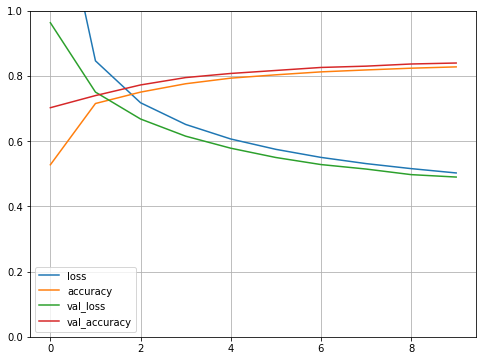

In [1]:
# Loading packages 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Set the seed 
tf.random.set_seed(42)
np.random.seed(42)


# Loading and preprocessing data 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# ANN architecture using ReLU activation function
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(units=30, kernel_initializer="he_normal"),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(units=100, kernel_initializer="he_normal"),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


# Execute the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid))


# Evaluating the model 
evaluation = model.evaluate(X_test, y_test)

print(f'\n\nModel accuracy: {evaluation[1]}')
print(f'Model loss: {evaluation[0]}\n\n')


# Visualize the output
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.legend(loc='best')

plt.show()

---

## Leaky ReLU

To solve the problem in relu we may want to use the Leaky ReLU which is mathematically defines as $Z_\alpha = max(\alpha z, z)$. The hyperparameter $\alpha$ hiw much the function leaks which in fact is the slope of the fucntion where it z<0 and typically it is set to 0.01.<br>

#### Advantages

- It fixes the “dying ReLU” problem, as it doesn’t have zero-slope parts.

- It speeds up training. There is evidence that having the “mean activation” be close to 0 makes training faster. Unlike ReLU, leaky ReLU is more “balanced,” and may therefore learn faster.

**Note:** Be aware that the result is not always consistent. Leaky ReLU isn’t always superior to plain ReLU, and should be considered only as an alternative.


<img src="images/leaky_relu.png" width=500>


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 47us/sample - loss: 1.3681 - accuracy: 0.5653 - val_loss: 0.9057 - val_accuracy: 0.7086
Epoch 2/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.8120 - accuracy: 0.7210 - val_loss: 0.7262 - val_accuracy: 0.7516
Epoch 3/10
55000/55000 [==============================] - 2s 42us/sample - loss: 0.6961 - accuracy: 0.7578 - val_loss: 0.6500 - val_accuracy: 0.7756
Epoch 4/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.6334 - accuracy: 0.7821 - val_loss: 0.6012 - val_accuracy: 0.7974
Epoch 5/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.5923 - accuracy: 0.7979 - val_loss: 0.5685 - val_accuracy: 0.8100
Epoch 6/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.5639 - accuracy: 0.8065 - val_loss: 0.5432 - val_accuracy: 0.8154
Epoch 7/10
55000/55000 [==============================] -

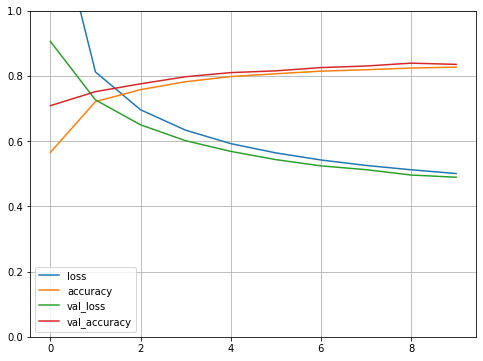

In [1]:
# Loading packages 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Set the seed 
tf.random.set_seed(42)
np.random.seed(42)


# Loading and preprocessing data 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# ANN architecture using LeakyReLU activation function
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(units=30, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(units=100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


# Execute the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid))


# Evaluating the model 
evaluation = model.evaluate(X_test, y_test)

print(f'\n\nModel accuracy: {evaluation[1]}')
print(f'Model loss: {evaluation[0]}\n\n')


# Visualize the output
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.legend(loc='best')

plt.show()

---

## PReLU

Parametric ReLU (PReLU) is a type of leaky ReLU that, instead of having a predetermined slope like 0.01, makes it a parameter for the neural network to figure out itself.


<img src="images/prelu.png" width=600>

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 71us/sample - loss: 1.4832 - accuracy: 0.5285 - val_loss: 0.9613 - val_accuracy: 0.7030
Epoch 2/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.8453 - accuracy: 0.7155 - val_loss: 0.7496 - val_accuracy: 0.7400
Epoch 3/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.7171 - accuracy: 0.7501 - val_loss: 0.6673 - val_accuracy: 0.7726
Epoch 4/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.6508 - accuracy: 0.7761 - val_loss: 0.6150 - val_accuracy: 0.7942
Epoch 5/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.6063 - accuracy: 0.7934 - val_loss: 0.5781 - val_accuracy: 0.8082
Epoch 6/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.5747 - accuracy: 0.8033 - val_loss: 0.5499 - val_accuracy: 0.8170
Epoch 7/10
55000/55000 [==============================] -

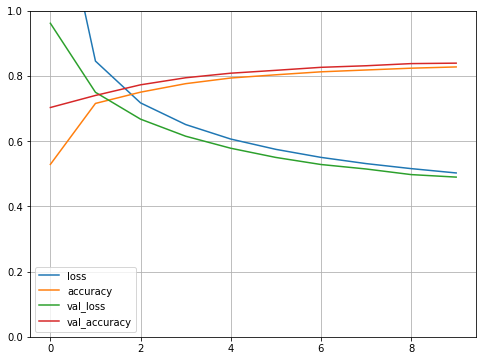

In [1]:
# Loading packages 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Set the seed 
tf.random.set_seed(42)
np.random.seed(42)


# Loading and preprocessing data 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# ANN architecture using PReLU activation function
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(units=30, kernel_initializer="he_normal"),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(units=100, kernel_initializer="he_normal"),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


# Execute the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid))


# Evaluating the model 
evaluation = model.evaluate(X_test, y_test)

print(f'\n\nModel accuracy: {evaluation[1]}')
print(f'Model loss: {evaluation[0]}\n\n')


# Visualize the output
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.legend(loc='best')

plt.show()

---

## ELU

Similar to leaky ReLU, ELU has a small slope for negative values. Instead of a straight line, it uses a log curve like the following:

<img src="images/elu.png" width=600>

- It is designed to combine the good parts of ReLU and leaky ReLU — while it doesn’t have the dying ReLU problem

- Mathematically ELU is defined as follow:
<img src="images/elu_formula.png" width=300>

<br>

- It takes on negative values when z < 0, which allows the unit to have an average output closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter $\alpha$ defines the value that the ELU function approaches when z is a large negative number. It is usually set to 1, but you can tweak it like any other hyperparameter.

- It has a nonzero gradient for z < 0, which avoids the dead neurons problem.

- If $\alpha$ is equal to 1 then the function is smooth everywhere, including around z = 0, which helps speed up Gradient Descent since it does not bounce as much to the left and right of z = 0.

- The main drawback of the ELU activation function is that it is slower to compute than the ReLU function and its variants (due to the use of the exponential function). Its faster convergence rate during training compensates for that slow computation, but still, at test time an ELU network will be slower than a ReLU network.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 50us/sample - loss: 1.2270 - accuracy: 0.5948 - val_loss: 0.8568 - val_accuracy: 0.7128
Epoch 2/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.7761 - accuracy: 0.7308 - val_loss: 0.6986 - val_accuracy: 0.7590
Epoch 3/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.6689 - accuracy: 0.7683 - val_loss: 0.6256 - val_accuracy: 0.7844
Epoch 4/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.6097 - accuracy: 0.7911 - val_loss: 0.5801 - val_accuracy: 0.8024
Epoch 5/10
55000/55000 [==============================] - 2s 42us/sample - loss: 0.5713 - accuracy: 0.8046 - val_loss: 0.5488 - val_accuracy: 0.8140
Epoch 6/10
55000/55000 [==============================] - 2s 42us/sample - loss: 0.5447 - accuracy: 0.8116 - val_loss: 0.5247 - val_accuracy: 0.8236
Epoch 7/10
55000/55000 [==============================] -

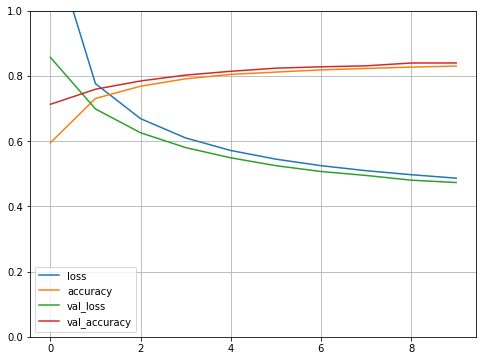

In [1]:
# Loading packages 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Set the seed 
tf.random.set_seed(42)
np.random.seed(42)


# Loading and preprocessing data 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# ANN architecture using ELU activation function
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(units=30,  activation='elu', kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=100, activation='elu', kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


# Execute the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid))


# Evaluating the model 
evaluation = model.evaluate(X_test, y_test)

print(f'\n\nModel accuracy: {evaluation[1]}')
print(f'Model loss: {evaluation[0]}\n\n')


# Visualize the output
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.legend(loc='best')

plt.show()

---

## SELU


The authors of Scaled ELU (Günter Klambauer et al) showed that if you build a neural network composed exclusively of a stack of dense layers, and if all hidden layers use the SELU activation function, then the network will self-normalize: the output of each layer will tend to preserve a mean of 0 and standard deviation of 1 during training, which solves the vanishing/exploding gradients problem. As a result, the SELU activation function often significantly outperforms other activation functions for such neural nets. There are, however, a few conditions for self-normalization to happen:
 
- The input features must be standardized (mean 0 and standard deviation 1). 

- Every hidden layer’s weights must be initialized with LeCun normal initialization.
    - kernel_initializer="lecun_normal".

- The network’s architecture must be sequential. Unfortunately, if you try to use SELU in nonsequential architectures, such as recurrent networks or networks with skip connections (i.e., connections that skip layers, such as in Wide & Deep nets), self-normalization will not be guaranteed, so SELU will not necessarily outperform other activation functions.

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 22s 404us/sample - loss: 1.1374 - accuracy: 0.5497 - val_loss: 1.0039 - val_accuracy: 0.6008
Epoch 2/10
55000/55000 [==============================] - 19s 338us/sample - loss: 0.8458 - accuracy: 0.6839 - val_loss: 0.6740 - val_accuracy: 0.7550
Epoch 3/10
55000/55000 [==============================] - 19s 341us/sample - loss: 0.6422 - accuracy: 0.7648 - val_loss: 0.7343 - val_accuracy: 0.7368
Epoch 4/10
55000/55000 [==============================] - 20s 357us/sample - loss: 0.5671 - accuracy: 0.7942 - val_loss: 0.5465 - val_accuracy: 0.8070
Epoch 5/10
55000/55000 [==============================] - 20s 372us/sample - loss: 0.5323 - accuracy: 0.8056 - val_loss: 0.5260 - val_accuracy: 0.8018
Epoch 6/10
55000/55000 [==============================] - 20s 359us/sample - loss: 0.5031 - accuracy: 0.8181 - val_loss: 0.5030 - val_accuracy: 0.8174
Epoch 7/10
55000/55000 [=====================

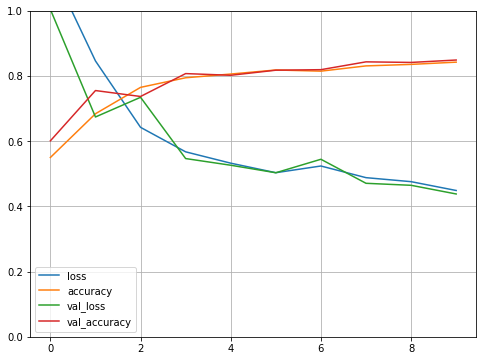

In [3]:
# Loading packages 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Set the seed 
tf.random.set_seed(42)
np.random.seed(42)


# Loading and preprocessing data 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# ANN architecture using ELU activation function
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, 
                                activation="selu",
                                kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(tf.keras.layers.Dense(100, 
                                    activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


# Compile the model 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


# Execute the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid))


# Evaluating the model 
evaluation = model.evaluate(X_test, y_test)

print(f'\n\nModel accuracy: {evaluation[1]}')
print(f'Model loss: {evaluation[0]}\n\n')


# Visualize the output
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.legend(loc='best')

plt.show()

## References

- https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7
- https://arxiv.org/abs/1505.00853
- https://arxiv.org/abs/1511.07289
- https://arxiv.org/abs/1706.02515
- https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646
- https://en.wikipedia.org/wiki/Activation_function#cite_note-24

---